# <h1 style='background:#1E90FF; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>Titanic - Machine Learning from Disaster</center></h1> 
 
<img src = "https://i.gifer.com/Y2Gp.gif" width = 1400 height = 606/>

The Titanic is a British transatlantic passenger steamer, the second Olympic-class liner of the White Star Line. The largest ship in world history in 1912-1913. During construction, received the number 401.

On her maiden voyage, she sank in the North Atlantic, colliding with an iceberg on the night of 14/15 April 1912.

Built in Belfast at the Harland & Wolff shipyard from 1909 to 1912. The Titanic was equipped with two four-cylinder steam engines and a steam turbine. The entire power plant had a capacity of 55,000 liters. With. The liner could reach speeds of up to 23 knots (42 km/h). Its displacement, which exceeded the twin steamer Olympic by 243 tons, was 52,310 tons. The ship's hull was made of steel. The hold and lower decks were divided into 16 compartments by bulkheads with sealed doors. If the bottom was damaged, the double bottom prevented water from entering the compartments. Shipbuilder magazine called the Titanic virtually unsinkable, a statement widely circulated in the press and among the public. In accordance with outdated regulations, the Titanic was equipped with 20 lifeboats, with a total capacity of 1,178 people, which was only a third of the ship's maximum load.

The cabins and public areas of the Titanic were divided into three classes. First class passengers were offered a swimming pool, a squash court, an À La Carte restaurant, two cafes, and a gym. All classes had dining and smoking lounges, open and closed promenades. The most luxurious and refined were first-class interiors, made in various artistic styles using expensive materials such as mahogany, gilding, stained glass, silk and others. Cabins and salons of the third class were decorated as simply as possible: steel walls were painted white or sheathed with wooden panels.

On April 10, 1912, the Titanic left Southampton for New York on her first and only voyage. Having made stops in French Cherbourg and Irish Queenstown, the liner entered the Atlantic Ocean with 1317 passengers and 908 crew members on board. It was planned to arrive in New York on April 17. Captain Edward Smith commanded the ship. On April 14, the Titanic radio station received seven ice warnings, but the liner continued to move almost at top speed. To avoid meeting with floating ice, the captain ordered to go a little south of the usual route.

On April 14, at 23:39, the lookout Frederick Fleet reported to the captain's bridge about the iceberg directly ahead. Less than a minute later there was a collision. Having received several holes, the ship began to sink. First of all, women and children were put on the boats. At 2:20 am on April 15, the Titanic sank, breaking in two, killing 1,496 people. 712 survivors were picked up by the steamer "Carpathia".

The wreckage of the Titanic rests at a depth of 3750 m. They were first discovered by the expedition of Robert Ballard in 1985. Subsequent expeditions recovered thousands of artifacts from the bottom. The bow and stern parts have sunk deep into the bottom silt and are in a dilapidated state; it is not possible to raise them to the surface intact.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#00BFFF; border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. IMPORTING LIBRARIES AND LOADING DATA**](#title-one)

### [**2. DATA INFORMATION**](#title-two)

### [**3. EXPLORATORY DATA ANALYSIS**](#title-three)
    
### [**4. STATISTICAL TESTS**](#title-four) 
    
### [**5. FEATURE ENGENEERING**](#title-five)

### [**6. MACHINE LEARNING**](#title-six)

### [**7. INFLUENCE ON POPULAR CULTURE**](#title-seven)
    
<a id="title-one"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>IMPORTING LIBRARIES AND LOADING DATA</center></h1>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [2]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [3]:
!pip install optuna

In [4]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

<a id="title-two"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>DATA INFORMATION</center></h1>

Let's look at the data.

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The training dataset contains data for 891 passengers. Each passenger is characterized by 12 variables, one of them is the target one.

In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


The test dataset contains data for 418 passengers.

Let's check the information about the type of variables.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains information on 5 integer, 2 fractional and 5 text features.

Let's look at the statistics of the dataset, as well as the presence of possible outliers.

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Hypothesis: The training dataset contains outliers in the variable age and ticket price.

In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The test dataset also contains information about the richest and poorest passengers.

What variables are in the dataset?
*survival-Survival 0=No, 1=Yes
*pclass-Ticket class 1=1st, 2=2nd, 3=3rd
*sex sex
* Age in years
* sibsp-# of siblings / spouses aboard the Titanic
* parch-# of parents / children aboard the Titanic
* ticket-ticket number
* fare-Passenger fare
* cabin-cabin number
* embarked-Port of Embarkation

<a id="title-three"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>EXPLORATORY DATA ANALYSIS</center></h1>

Let's check the data for information gaps.

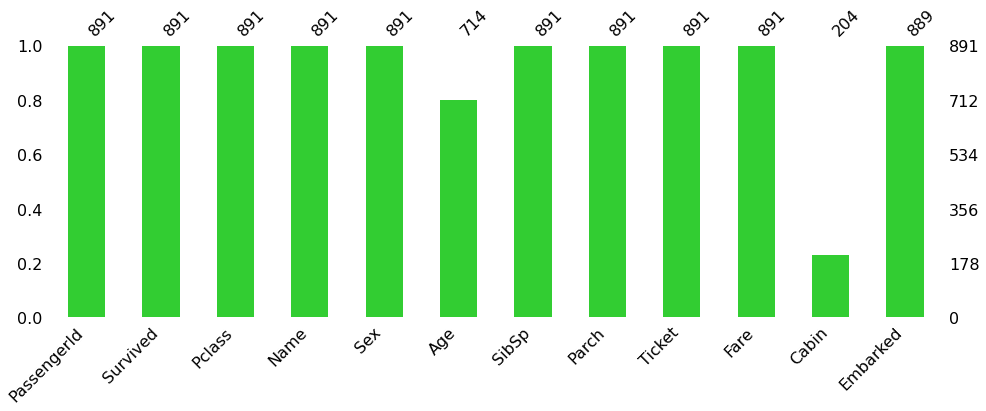

In [12]:
msno.bar(train, figsize = (16,5),color = "#32CD32")
plt.show()

there are big omissions of information in age as well as cabin number. Minor in the port of loading.

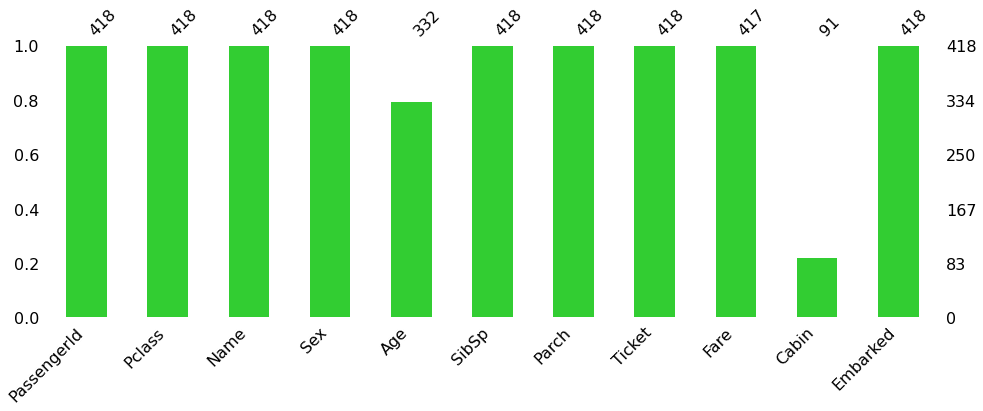

In [13]:
msno.bar(test, figsize = (16,5),color = "#32CD32")
plt.show()

Large omissions of information were found in the age, as well as the cabin number.

Let's check the data for the presence of categorical features.

In [14]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'PassengerId' has '891' unique values
Feature 'Survived' has '2' unique values
Feature 'Pclass' has '3' unique values
Feature 'Name' has '891' unique values
Feature 'Sex' has '2' unique values
Feature 'Age' has '89' unique values
Feature 'SibSp' has '7' unique values
Feature 'Parch' has '7' unique values
Feature 'Ticket' has '681' unique values
Feature 'Fare' has '248' unique values
Feature 'Cabin' has '148' unique values
Feature 'Embarked' has '4' unique values


In [15]:
for column_name in test.columns:
    unique_values = len(test[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'PassengerId' has '418' unique values
Feature 'Pclass' has '3' unique values
Feature 'Name' has '418' unique values
Feature 'Sex' has '2' unique values
Feature 'Age' has '80' unique values
Feature 'SibSp' has '7' unique values
Feature 'Parch' has '8' unique values
Feature 'Ticket' has '363' unique values
Feature 'Fare' has '170' unique values
Feature 'Cabin' has '77' unique values
Feature 'Embarked' has '3' unique values


There are differences between the test and training datasets: some categorical variables differ in the number of unique features. This means that in the future, the data must be combined in order to correctly fill in the information gaps, as well as to transform the features.

Let's analyze numerical variables in two datasets.

In [16]:
numeric=['Fare','Age']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

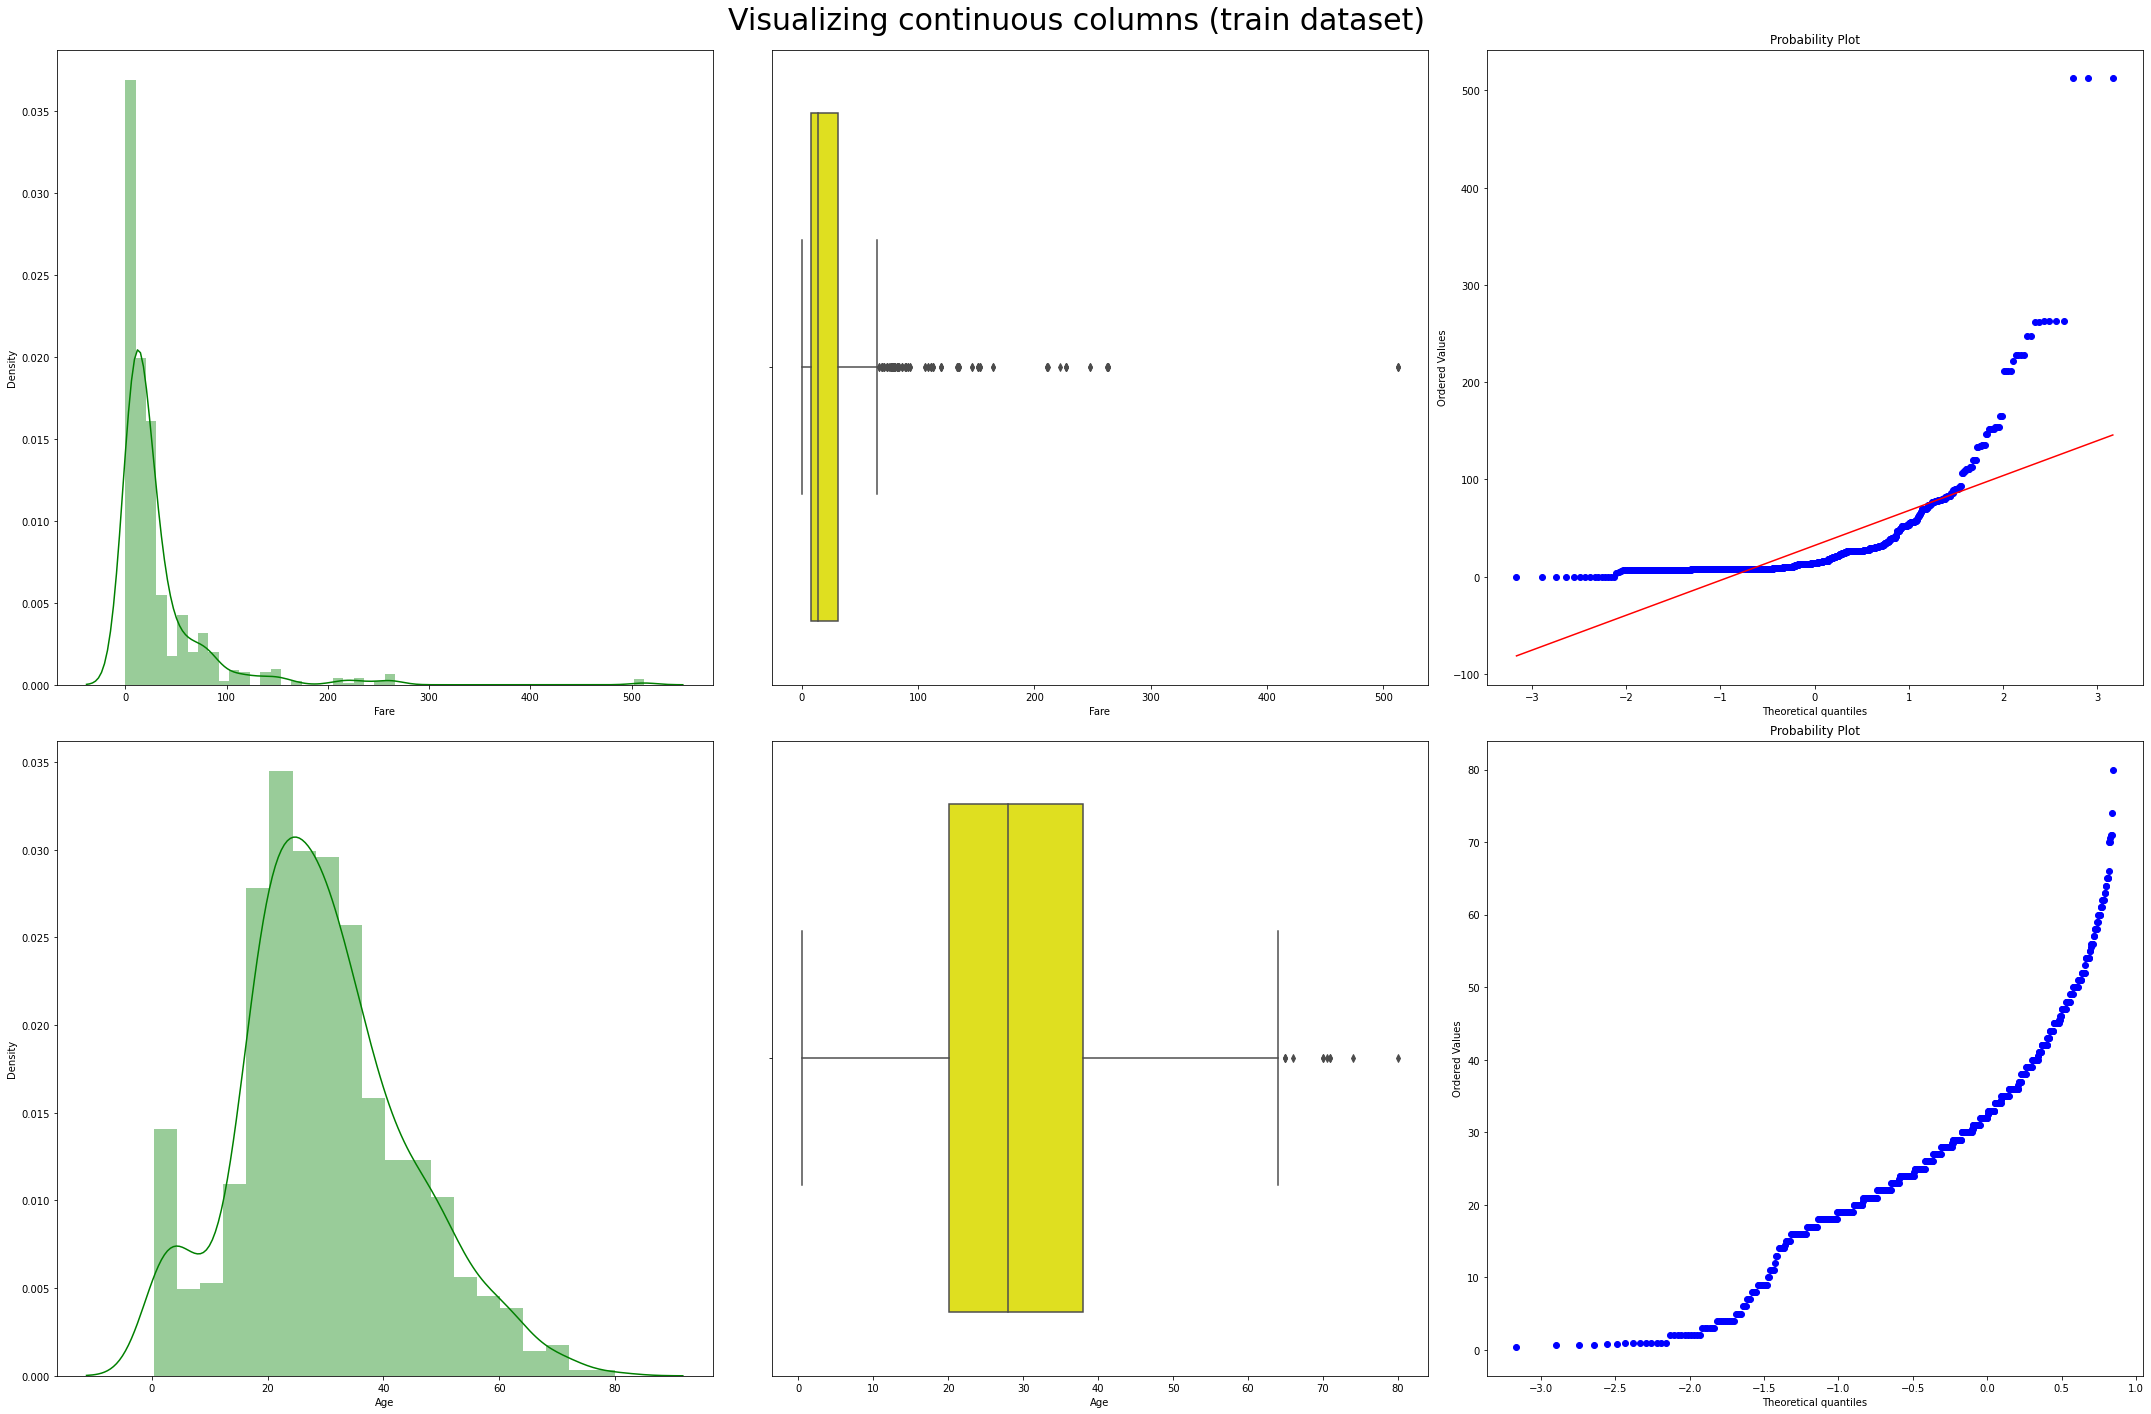

In [17]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

Hypotheses:
* The distribution of age is close to normal, the value of ticket prices has a long "tail".
* Boxplots of both features indicate the presence of possible outliers for these variables (separate patterns in the data are possible).

Text(0.5, 0.98, 'Visualizing continuous columns (test dataset)')

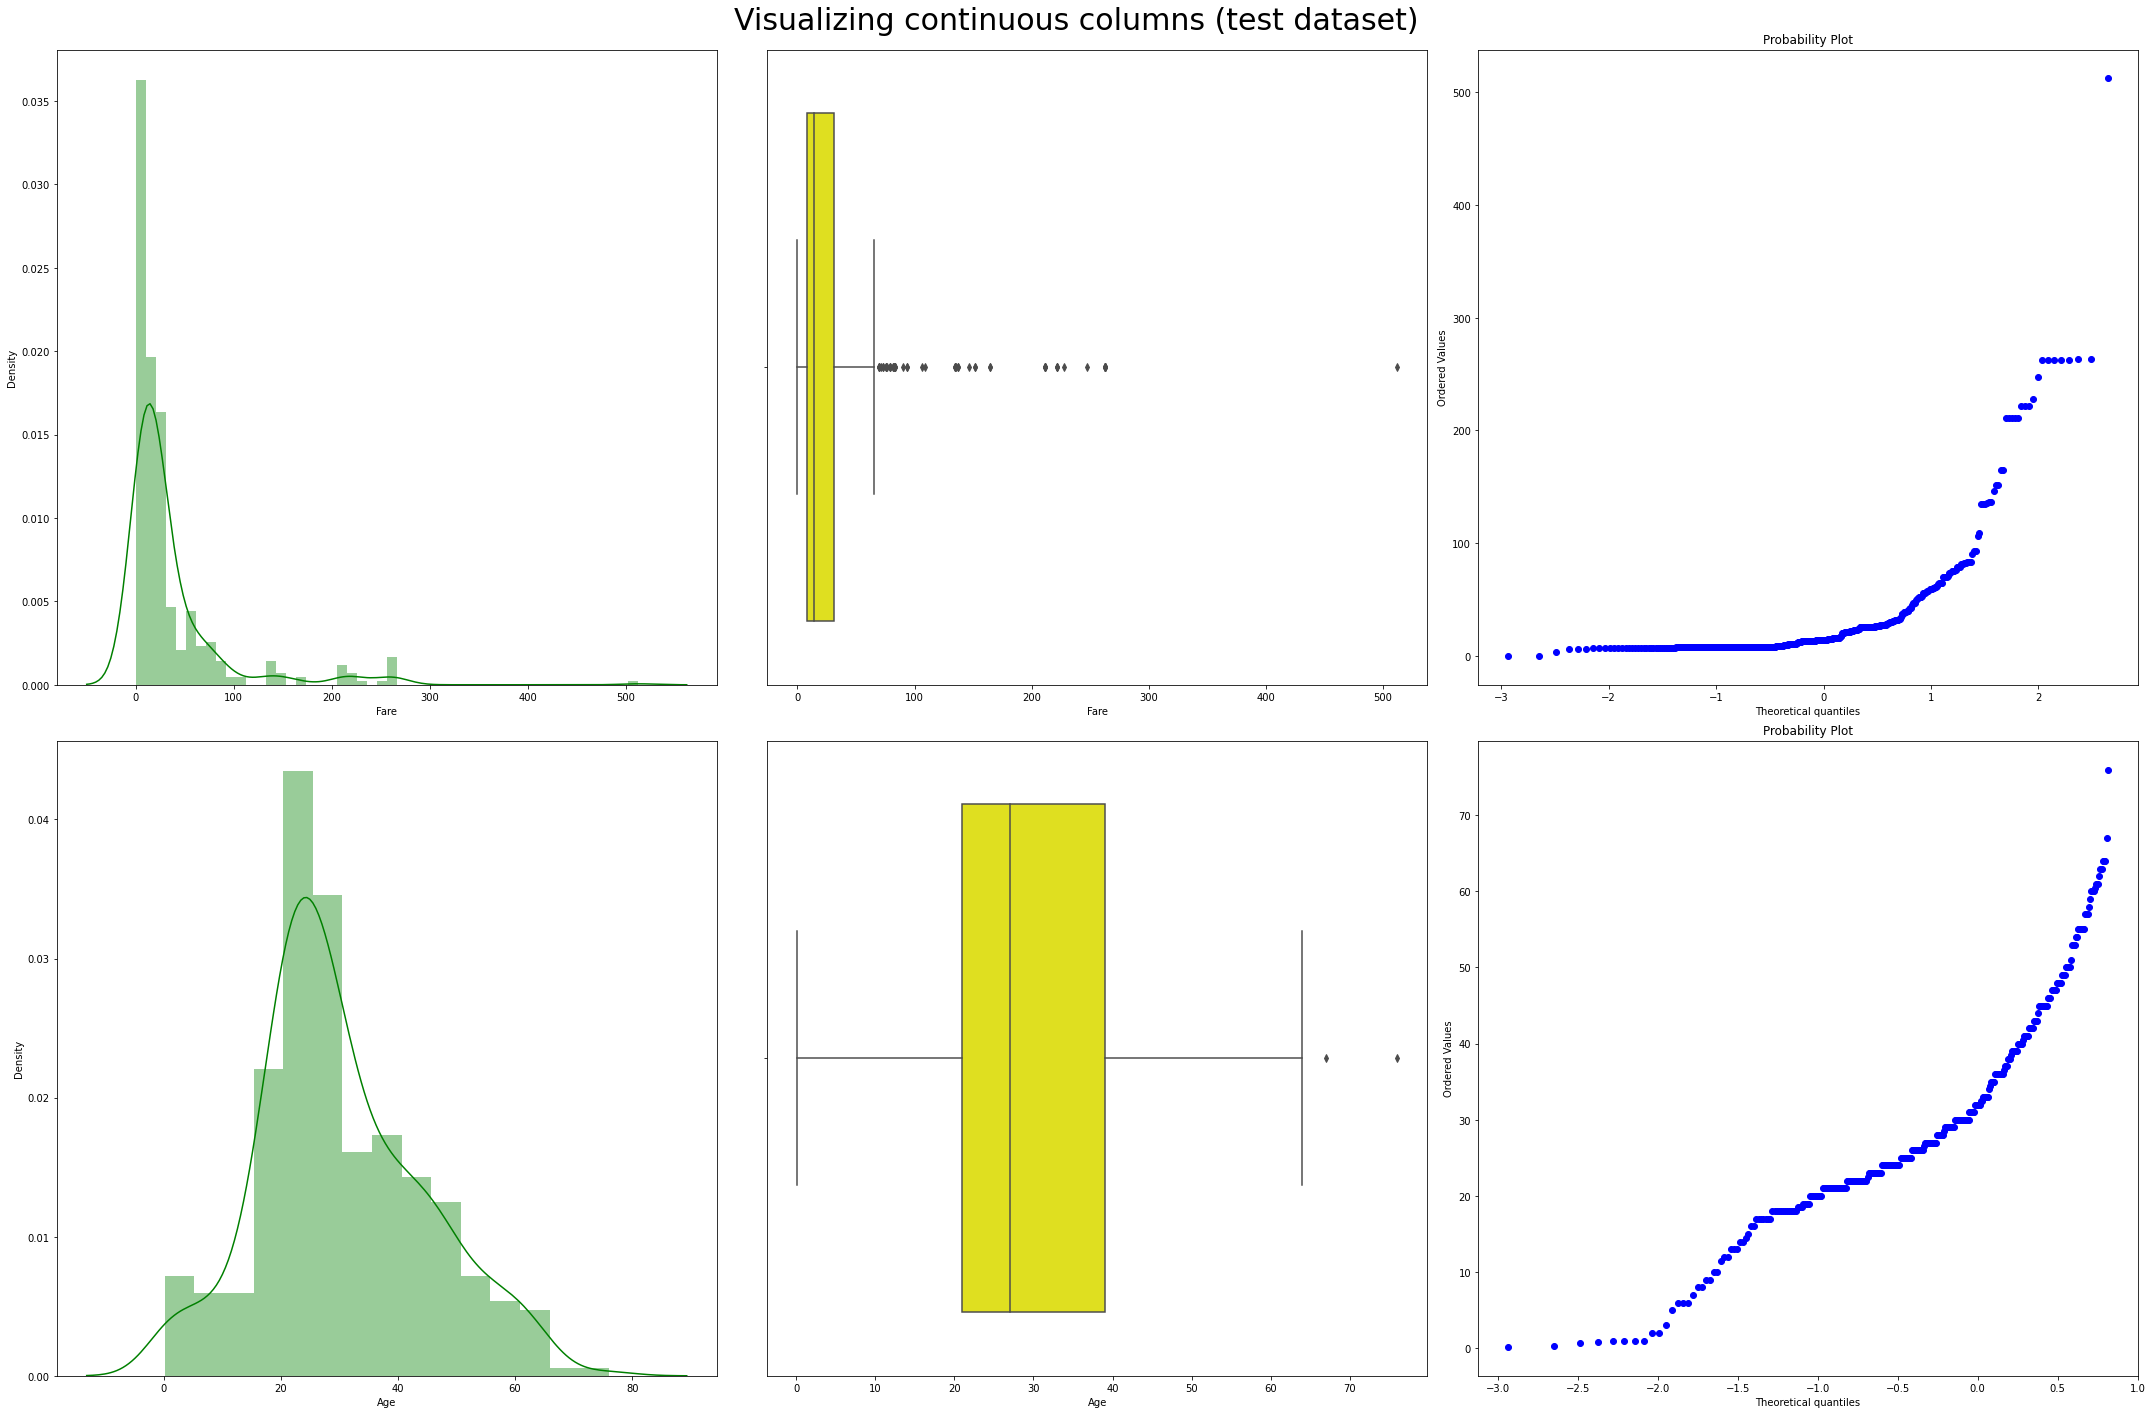

In [18]:
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(test[i],ax=ax[index,0],color='green')
    sns.boxplot(test[i],ax=ax[index,1],color='yellow')
    stats.probplot(test[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (test dataset)",fontsize=30)

Let's visualize categorical variables depending on the survival of passengers.

In [19]:
categorical_features=['Pclass','Sex','SibSp','Parch','Embarked','Survived']

<Figure size 1080x1800 with 0 Axes>

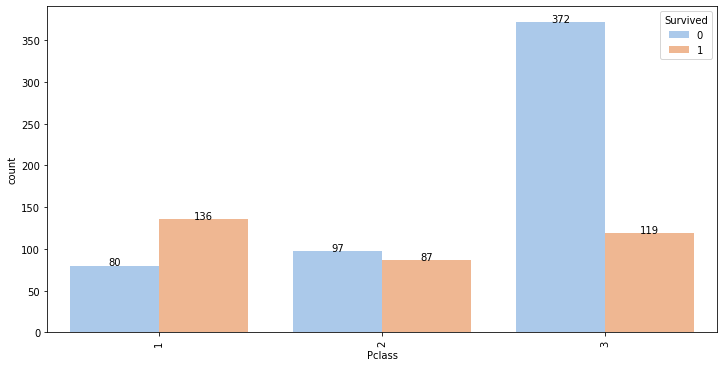

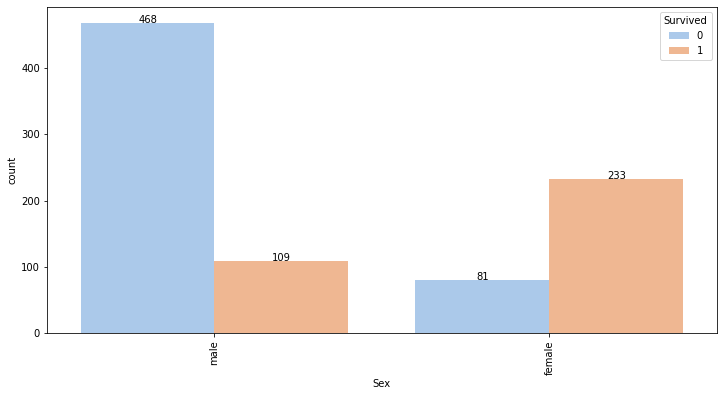

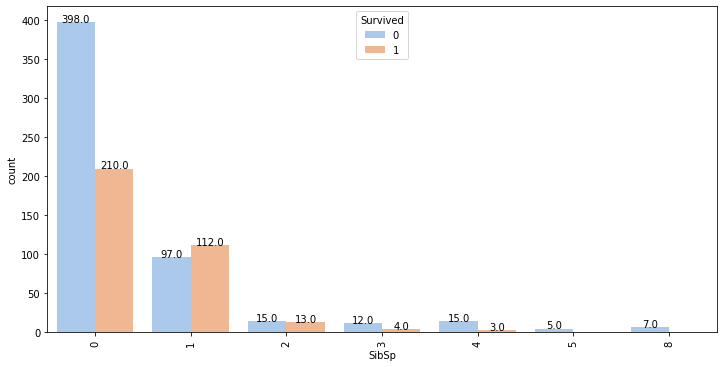

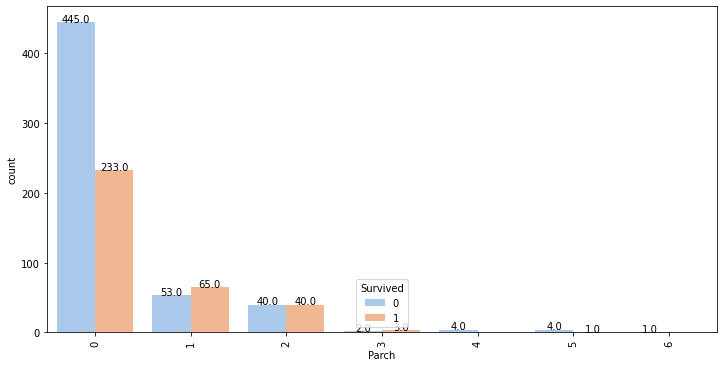

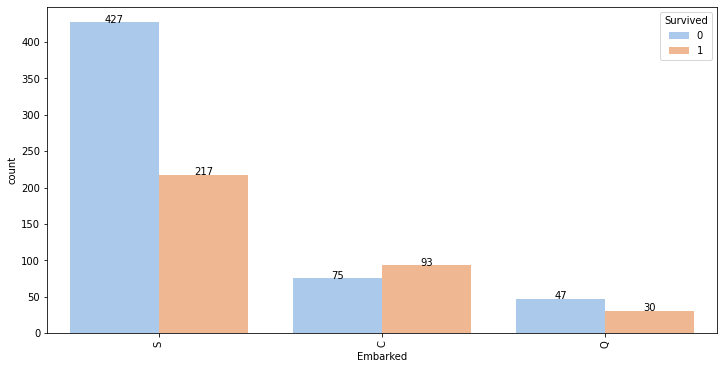

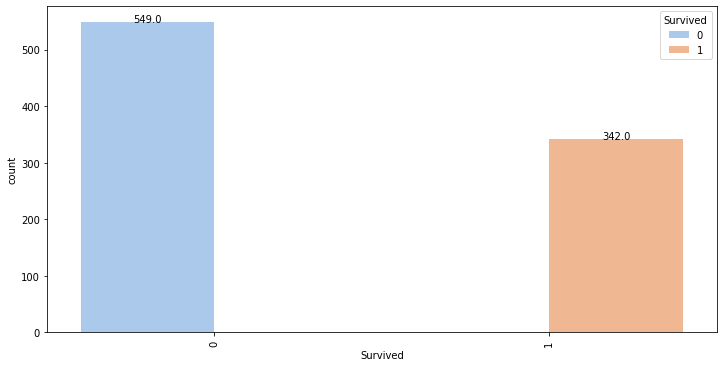

In [20]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,hue='Survived',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

Hypotheses:
* With the improvement of the class of the cabin, the chance of survival increases.
* The port of departure had an impact on the chance of survival.
* Most of the women survived.
* The optimal number of family members is 1 or 2.

<a id="title-four"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>STATISTICAL TESTS</center></h1>

We use statistical tests to test hypotheses. First, let's test the hypotheses about the normality of the distribution of numerical variables.

In [21]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric:
	stat, p = shapiro(train[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print(f'Sample {feature} looks Gaussian (fail to reject H0),')
	else:
		print(f'Sample {feature} does not look Gaussian (reject H0)')

Statistics=0.522, p=0.000
Sample Fare does not look Gaussian (reject H0)
Statistics=nan, p=1.000
Sample Age looks Gaussian (fail to reject H0),


The hypotheses about the normal distribution were confirmed. For the effect of these variables on the target, 2 different tests should be used. For the Fare variable, we use the Mann-Whitney U-test, for the Age variable, we use the Student's T-test.

The default or null hypothesis is that there is no difference between the distributions of the data samples. The rejection of this hypothesis suggests that there is probably some difference between the samples. More specifically, the test determines whether any randomly selected observation from one sample is equally likely to be greater than or less than a sample from another distribution. If violated, it suggests differing distributions.

In [22]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(train['Survived'], train['Fare'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
		print('There are no significant differences (fail to reject H0)')
else:
		print('The sample distributions are not equal (reject H0)')

Statistics=9247.500, p=0.000
The sample distributions are not equal (reject H0)


In [23]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(train['Survived'], train['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
		print('There are no significant differences (fail to reject H0)')
else:
		print('The sample distributions are not equal (reject H0)')

Statistics=nan, p=nan
The sample distributions are not equal (reject H0)


Both variables affect the target variable. You need to add them to the forecast building model.

Next, we will conduct statistical tests of the influence of categorical variables on the target categorical variable. To do this, we use the Chi-square-Pearson test.

In [24]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(train[feature],train['Survived']))
# interpret p-value
  alpha = 0.05
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p<=alpha:
    print ( f'Dependent with {feature} (reject H0)' )
  else :
    print ( f'Independent with {feature} (H0 holds true)' )

Statistics=102.889, p=0.000
Dependent with Pclass (reject H0)
Statistics=260.717, p=0.000
Dependent with Sex (reject H0)
Statistics=37.272, p=0.000
Dependent with SibSp (reject H0)
Statistics=27.926, p=0.000
Dependent with Parch (reject H0)
Statistics=26.489, p=0.000
Dependent with Embarked (reject H0)
Statistics=886.777, p=0.000
Dependent with Survived (reject H0)


All variables have an effect on the target variable. You need to add them to the forecast building model. Gender and ticket class have the most influence.

<a id="title-five"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>FEATURE ENGENEERING</center></h1>

Let us determine the sizes of the training and test samples. In the future, we will combine these datasets, after separating the target variable.

In [25]:
train.shape, test.shape

((891, 12), (418, 11))

In [26]:
y=train['Survived']
train.drop('Survived',axis=1,inplace=True)

In [27]:
WITH=pd.concat([train,test])

In [28]:
WITH

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


delete information about the name, ticket number, cabin and index

In [29]:
WITH.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [30]:
WITH

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Let's check the data again for missing information.

In [31]:
WITH.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

because there are few gaps in the categorical variables, then we will fill them with the mode.

In [32]:
WITH['Embarked'].mode()

0    S
dtype: object

In [33]:
WITH['Fare'].fillna(33,inplace=True)
WITH['Embarked'].fillna('S',inplace=True)

In [34]:
ind=range(1309)
WITH['Index']=ind
WITH=WITH.set_index('Index')

In [35]:
WITH

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Index,,,,,,,
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S
1305,1,female,39.0,0,0,108.9000,C
1306,3,male,38.5,0,0,7.2500,S


Let us construct new features.
T.K. gender and port of departure are categorical features that indicate the unique property of the object; it is proposed to encode them using the OneHot method.

In [36]:
Sex=pd.get_dummies(WITH.Sex).add_prefix('Sex')
WITH=WITH.merge(Sex,on='Index')
WITH=WITH.drop(['Sex'],axis=1)

In [37]:
Embarked=pd.get_dummies(WITH.Embarked).add_prefix('Embarked')
WITH=WITH.merge(Embarked,on='Index')
WITH=WITH.drop(['Embarked'],axis=1)

To fill in the missing values in the Age variable, we will use the KNNImputer method.

In [38]:
from sklearn.impute import KNNImputer

In [39]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")

In [40]:
l=imputer.fit_transform(WITH)

In [41]:
WITH1=pd.DataFrame(l,columns=WITH.columns)

In [42]:
for column_name in WITH1.columns:
    unique_values = len(WITH1[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Pclass' has '3' unique values
Feature 'Age' has '187' unique values
Feature 'SibSp' has '7' unique values
Feature 'Parch' has '8' unique values
Feature 'Fare' has '281' unique values
Feature 'Sexfemale' has '2' unique values
Feature 'Sexmale' has '2' unique values
Feature 'EmbarkedC' has '2' unique values
Feature 'EmbarkedQ' has '2' unique values
Feature 'EmbarkedS' has '2' unique values


We divide the dataset into training and training samples.

In [43]:
train1=WITH1[:891]
test1=WITH1[891:]

In [44]:
train1.shape, test1.shape

((891, 10), (418, 10))

handle outliers using LocalOutlierFactor

In [45]:
train1['Survived']=y

In [46]:
train1

,Pclass,Age,SibSp,Parch,Fare,Sexfemale,Sexmale,EmbarkedC,EmbarkedQ,EmbarkedS,Survived
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,1
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,1
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,1
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0
887,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0,1
888,3.0,22.9,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,1.0,0
889,1.0,26.0,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0,1


In [47]:
from sklearn.neighbors import LocalOutlierFactor

In [48]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(train1) 

In [49]:
train1['Out']=y_pred

In [50]:
Out=train[train1['Out']!=1]

In [51]:
Out.shape

(71, 11)

In [52]:
train2=train1[train1['Out']==1]

In [53]:
train2=train2.drop('Out',axis=1)

In [54]:
train2

,Pclass,Age,SibSp,Parch,Fare,Sexfemale,Sexmale,EmbarkedC,EmbarkedQ,EmbarkedS,Survived
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,1
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,1
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,1
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0
887,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0,1
888,3.0,22.9,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,1.0,0
889,1.0,26.0,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0,1


To restore class balances, use the SMOTE method

In [55]:
from imblearn.over_sampling import SMOTE 

In [56]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(train2.drop(["Survived"],axis=1),train2["Survived"])

In the test dataset, the same outliers are observed as in the training one, outlier processing is not needed.

<a id="title-six"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>MACHINE LEARNING</center></h1>

In [57]:
!pip install catboost

In [58]:
from catboost import CatBoostClassifier

In [59]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.3,random_state=42)

In [60]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier(),CatBoostClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'cross_val_score:{cross_val_score(m, features,labels, cv=5).mean()}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.7532467532467533
Precission_score: 0.76
Recall_score: 0.7402597402597403
F1-score: 0.75
cross_val_score:0.7534880416765333
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.7922077922077922
Precission_score: 0.8125
Recall_score: 0.7597402597402597
F1-score: 0.785234899328859
cross_val_score:0.7797726734548899
------------------------------ 

[07:31:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, m

For further tuning of the model, select CatBoostClassifier.

In [61]:
def objective(trial):
    data, target = features, labels
    train_x, valid_x, train_y, valid_y = train_test_split(features, labels, test_size=0.3)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-08-18 07:31:25,222] A new study created in memory with name: no-name-b16c0b1e-9e6a-4ac3-a60a-a9578232eed2
[I 2022-08-18 07:31:26,436] Trial 0 finished with value: 0.8246753246753247 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09973443789562854, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.0230147241535}. Best is trial 0 with value: 0.8246753246753247.
[I 2022-08-18 07:31:27,281] Trial 1 finished with value: 0.8246753246753247 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.05845291482618488, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8246753246753247.
[I 2022-08-18 07:31:27,542] Trial 2 finished with value: 0.7954545454545454 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08763231027066301, 'depth': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 7.786001047026096}. Best is trial 0 wit

Number of finished trials: 100
Best trial:
  Value: 0.8766233766233766
  Params: 
    objective: Logloss
    colsample_bylevel: 0.07168278353451389
    depth: 10
    boosting_type: Plain
    bootstrap_type: MVS


In [62]:
from optuna import visualization
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))
hist = study.trials_dataframe()
hist.head()

Best trial: score 0.8766233766233766,
params {'objective': 'Logloss', 'colsample_bylevel': 0.07168278353451389, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}


,number,value,datetime_start,datetime_complete,duration,params_bagging_temperature,params_boosting_type,params_bootstrap_type,params_colsample_bylevel,params_depth,params_objective,params_subsample,state
0,0,0.824675,2022-08-18 07:31:25.225619,2022-08-18 07:31:26.435880,0 days 00:00:01.210261,2.023015,Ordered,Bayesian,0.099734,11,Logloss,NaN,COMPLETE
1,1,0.824675,2022-08-18 07:31:26.437506,2022-08-18 07:31:27.280813,0 days 00:00:00.843307,NaN,Ordered,MVS,0.058453,3,CrossEntropy,NaN,COMPLETE
2,2,0.795455,2022-08-18 07:31:27.282479,2022-08-18 07:31:27.541720,0 days 00:00:00.259241,7.786001,Plain,Bayesian,0.087632,1,Logloss,NaN,COMPLETE
3,3,0.769481,2022-08-18 07:31:27.543732,2022-08-18 07:31:28.336808,0 days 00:00:00.793076,NaN,Ordered,Bernoulli,0.021577,8,Logloss,0.616664,COMPLETE
4,4,0.818182,2022-08-18 07:31:28.338350,2022-08-18 07:31:28.609767,0 days 00:00:00.271417,NaN,Plain,MVS,0.028630,3,CrossEntropy,NaN,COMPLETE


In [63]:
optuna.visualization.plot_slice(study)

In [64]:
optuna.visualization.plot_optimization_history(study)

In [65]:
clf2=CatBoostClassifier(objective='Logloss',
    colsample_bylevel = 0.08326391731968708,
    depth = 8,
    boosting_type= 'Ordered',
    bootstrap_type= 'MVS')
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print(f'Accuracy_score: {accuracy_score(y_test,y_pred2)}')
print(f'Precission_score: {precision_score(y_test,y_pred2)}')
print(f'Recall_score: {recall_score(y_test,y_pred2)}')
print(f'F1-score: {f1_score(y_test,y_pred2)}')

Learning rate set to 0.008943
0:	learn: 0.6900886	total: 1.6ms	remaining: 1.59s
1:	learn: 0.6897255	total: 3.82ms	remaining: 1.91s
2:	learn: 0.6864002	total: 5.19ms	remaining: 1.73s
3:	learn: 0.6848024	total: 6.69ms	remaining: 1.67s
4:	learn: 0.6841450	total: 7.79ms	remaining: 1.55s
5:	learn: 0.6841450	total: 8.7ms	remaining: 1.44s
6:	learn: 0.6840320	total: 9.84ms	remaining: 1.4s
7:	learn: 0.6838662	total: 11.2ms	remaining: 1.38s
8:	learn: 0.6838662	total: 12.3ms	remaining: 1.36s
9:	learn: 0.6837563	total: 13.7ms	remaining: 1.36s
10:	learn: 0.6837563	total: 16.3ms	remaining: 1.46s
11:	learn: 0.6830097	total: 18.6ms	remaining: 1.53s
12:	learn: 0.6794971	total: 20ms	remaining: 1.52s
13:	learn: 0.6766421	total: 22.8ms	remaining: 1.61s
14:	learn: 0.6766421	total: 25.3ms	remaining: 1.66s
15:	learn: 0.6766421	total: 26.6ms	remaining: 1.64s
16:	learn: 0.6752628	total: 29.1ms	remaining: 1.68s
17:	learn: 0.6752628	total: 30ms	remaining: 1.64s
18:	learn: 0.6715257	total: 31.8ms	remaining: 1.64s

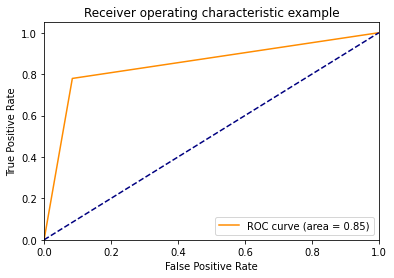

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [67]:
y_predicted=clf2.predict(test1)

In [68]:
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
submissions = pd.concat([test.PassengerId,pd.Series(y_predicted)],axis=1)

In [70]:
submissions=submissions.rename(columns={0:'Survived'})

In [71]:
submissions.to_csv('submissionTitanic44.csv',index=False)

Prediction completed. The final result increased slightly.

<a id="title-seven"></a>
<h1 style='background:#00BFFF; border:2; border-radius: 10px; color:black'><center>INFLUENCE ON POPULAR CULTURE</center></h1>

"Titanic" occupies a significant place in popular culture. For decades from the date of the crash, interest in the history of the liner, the circumstances of the disaster, and the biographies of people connected in one way or another with the Titanic has not faded away. The tragic fate of the ship is devoted to many books, films, poems, songs, performances, works of sculpture and architecture. The name of the ship is often used as a common noun. In the public mind, the Titanic has become a symbol of arrogance, arrogance, pride and class inequality.

According to British writer Don Foster, the sinking of the Titanic marked the end of an era of self-confidence and optimism. He noted that the fate that befell the liner is similar to classical ancient Greek tragedies, and episodes of heroism and sentimentality, along with pretense and paradox, give the story of the Titanic the features characteristic of an Elizabethan tragedy. The proximity to the plots of world-famous works of literature, whether it be the ancient Greek myths of the Titans, Icarus and Narcissus or the tragedy of Macbeth, only contributed to the emergence of a strong public outcry in connection with the crash of the liner. Publicist Win Wade noted that the tragedy separated the 19th century from the 20th, and in terms of its psychological impact on the English-speaking world of that time, it can be compared with the assassinations of Abraham Lincoln and John F. Kennedy. Stephanie Barszewski called the sinking of the Titanic one of the most exciting events in human history. She explained the undying interest in the ship with the deep symbolism and tragedy that filled its history. “Human ingenuity can provide [success], but it certainly fails when it accidentally meets the forces of nature,” Barshevsky concluded.

There are four waves of increased interest in the Titanic. The first began immediately after the crash, but in 1914, when the First World War broke out, it stopped. The second time a surge of increased attention was observed after the release in 1955 of the best-selling book by Walter Lord "Last Night". Three years later, a feature film of the same name was released. The third and longest wave of popularity began in 1985 after the discovery by the expedition of Robert Ballard of the wreckage of the liner on the ocean floor. In 1997, James Cameron's feature film Titanic was released, reinforcing public interest in the history of the liner. The sinking of the Costa Concordia cruise ship in January 2012, three months before the 100th anniversary of the Titanic disaster, and the commemoration of the tragic date marked the latest surge of interest that continues to this day.